In [92]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [93]:
# Load data from the pickle file into a DataFrame
with open('/Users/maryam/code/MaryamS-61/phoneme_classification/raw_data/Crema_spec_cnn_input.pkl', 'rb') as file:
    loaded_df = pickle.load(file)
loaded_df

,Label,FileNames,SpecInputCNN,EncodedLabels
0,SAD,1081_ITH_SAD_XX.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
1,ANG,1081_IEO_ANG_LO.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,NEU,1079_TSI_NEU_XX.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
3,HAP,1080_IEO_HAP_LO.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
4,SAD,1079_IEO_SAD_HI.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
...,...,...,...,...
7437,HAP,1007_IWL_HAP_XX.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
7438,DIS,1008_IEO_DIS_LO.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
7439,SAD,1006_TSI_SAD_XX.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
7440,ANG,1006_TAI_ANG_XX.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


# Creating Train and Test set

In [45]:
X = np.stack([matrix for matrix in loaded_df.SpecInputCNN])

In [46]:
y = np.stack([label for label in loaded_df.EncodedLabels])

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# creating a small subset (testing purpose)

In [8]:
# Considering only 1/50th of the 7441 Spectrograms
reduction_factor = 50

# Choosing the random indices of small train set and small test set
idx_train =  np.random.choice(len(x_train), round(len(x_train)/reduction_factor), replace=False)
idx_test =  np.random.choice(len(x_test), round(len(x_test)/reduction_factor), replace=False)


In [10]:
x_train_small = x_train[idx_train]
x_test_small = x_test[idx_test]

In [11]:
labels_train_small = y[idx_train]
labels_test_small = y[idx_test]

In [12]:

print("------------------ Before -----------------")
print(x_train.shape, x_test.shape)

print("")

print("--- After applying the reduction factor ---")
print(x_train_small.shape, x_test_small.shape)

print("")
print("-"*43)

#unique, counts = np.unique(labels_train_small, return_counts=True)
#dict(zip(unique, counts))

------------------ Before -----------------
(5953, 1031, 85) (1489, 1031, 85)

--- After applying the reduction factor ---
(119, 1031, 85) (30, 1031, 85)

-------------------------------------------


# Define a Model

In [72]:
def initialize_model():
    model = models.Sequential()

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(128, kernel_size=(9, 9), activation='relu', padding='same', strides= (4,2), input_shape=(1031, 85, 1)))
    #model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.2))

    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(128, (4, 4), activation='relu', padding='same', strides= (2,2)))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.3))

    ### third Convolution & MaxPooling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides= (1,1)))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.3))

    ### fourth Convolution & MaxPooling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides= (1,1)))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))


    ### Flattening
    model.add(layers.Flatten())

    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    #model.add(layers.Dense(32, activation='relu'))

    ### Last layer
    model.add(layers.Dense(6, activation='softmax'))

    return model


In [73]:
def compile_model(model):
    return model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
model = initialize_model()
compile_model(model=model)

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 258, 43, 128)      10496     
                                                                 
 dropout_3 (Dropout)         (None, 258, 43, 128)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 129, 22, 128)      262272    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 11, 128)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 64, 11, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 11, 32)        36896     
                                                      

# Train the model

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

#es = EarlyStopping()

history = model.fit(x_train,
          y_train,
          validation_split = 0.3,
          epochs = 1,
          batch_size = 32,
          verbose = 1,
          #callbacks = [es]
          )

131/131 [==============================] - 107s 817ms/step - loss: 1.6551 - accuracy: 0.2889 - val_loss: 1.4931 - val_accuracy: 0.3981


In [45]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

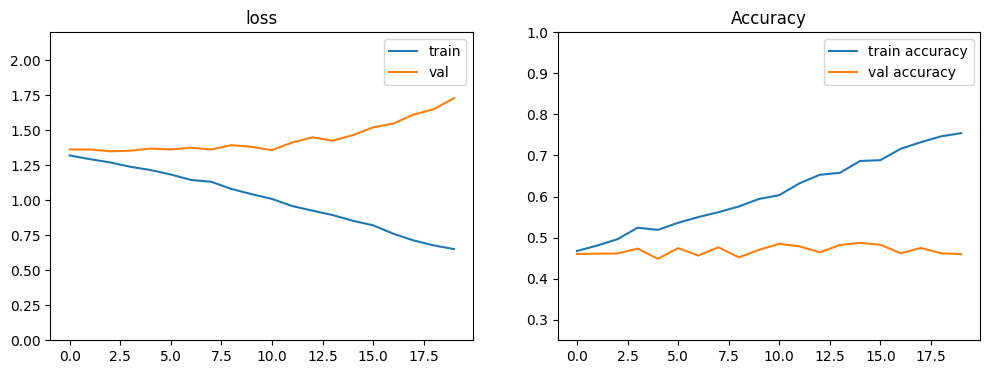

In [35]:
plot_history(history)

# Saving the model and Weights

In [46]:
#model.save('first_cnn_model_maryam.h5')

/Users/maryam/.pyenv/versions/3.10.6/envs/phoneme_classification/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
#model.save_weights('first_cnn_model_weights_20epochs.h5')

# Prediction

In [87]:
loaded_model = tf.keras.models.load_model('/Users/maryam/code/MaryamS-61/phoneme_classification/notebooks/Model/first_cnn_model_maryam.h5')

In [88]:
with open('Crema_sample_cnn_input.pkl', 'rb') as file:
    loaded_df = pickle.load(file)
loaded_df

Label                                                          SAD
FileNames                                      1081_ITH_SAD_XX.wav
SpecInputCNN     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
EncodedLabels                       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
Name: 0, dtype: object

In [90]:
loaded_model.predict(np.expand_dims(loaded_df.SpecInputCNN, axis=0))

1/1 [==============================] - 0s 52ms/step


array([[0.00618201, 0.12964697, 0.15152083, 0.04240068, 0.12047109,
        0.54977834]], dtype=float32)

# Test with different Emotions

In [97]:
happy_file = loaded_df[loaded_df['Label'] == 'HAP'].iloc[0]

In [98]:
with open('Crema_happy_cnn_input.pkl', 'wb') as file:
    pickle.dump(happy_file, file)